In [6]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
from urllib.parse import urlparse
from requests_html import HTMLSession

In [8]:
def parse_elements(url,element):
    session = HTMLSession()
    r = session.get(url)
    elements = r.html.find(element)
    return elements

In [9]:
url = 'https://bapittu.medium.com/top-10-high-paying-it-jobs-in-2021-e63953b193b5'

In [10]:
paragraphs = parse_elements(url, 'p')

Modified DF :: 
                                                  USA                    \
                               Job Category     High      Mid      Low   
0                            Data Scientist  $200000  $150000  $120000   
1  Machine Learning Expert and AI Architect  $180000  $140000  $100000   
2                         Big Data Engineer  $160000  $130000  $900000   
3                  Cloud Solution Architect  $170000  $125000  $800000   
4                       Blockchain Engineer  $155000  $120000  $900000   
5   Software Architect / Solution Architect  $155000  $120000  $900000   
6                           DevOps Engineer  $145000  $120000  $800000   
7                       Full Stack Engineer  $140000  $110000  $800000   
8                           Product Manager  $120000   $90000  $700000   
9                          Business Analyst  $100000   $80000  $750000   

      India                      
      High       Mid       Low   
0  ₹6000000  ₹3000000  ₹12

<Axes: xlabel='Job Category'>

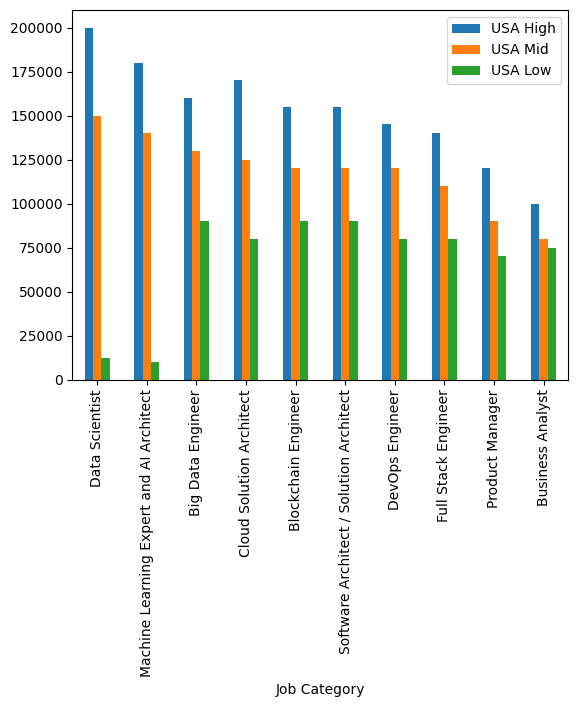

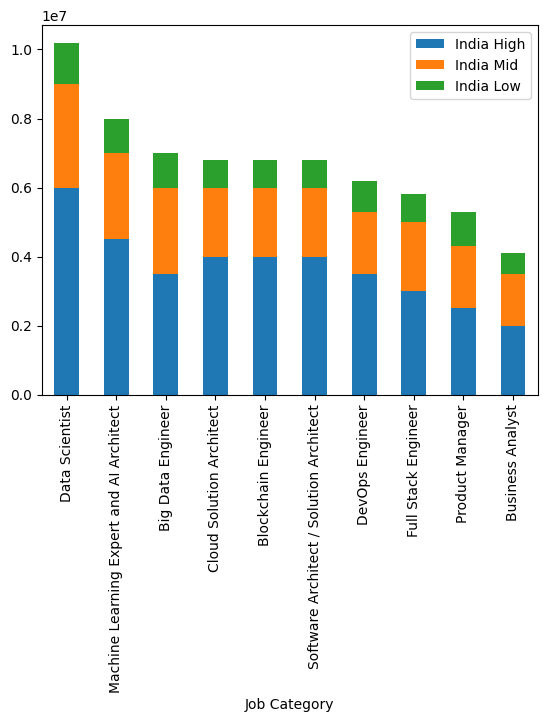

In [13]:
usaSalText = 'Salary In USA'
indSalText = "Salary In India"
jobList = ["Data Scientist", "Machine Learning Expert and AI Architect", "Big Data Engineer", "Cloud Solution Architect", "Blockchain Engineer", "Software Architect / Solution Architect", "DevOps Engineer", "Full Stack Engineer", "Product Manager", "Business Analyst"];
usaHiSal = [] 
usaMidSal = []
usaLowSal = []
indHiSal = []
indMidSal = []
indLowSal = []
usaHiSalValues = [] 
usaMidSalValues = []
usaLowSalValues = []
indHiSalValues = []
indMidSalValues = []
indLowSalValues = []
for para in paragraphs:
  pText = para.text # Salary In USA- High -$200000, Mid-$150000, Low-$120000
                    # Salary In India-High-upto 6000000, Mid-3000000, Low- 1200000
  if (usaSalText in pText) : 
      sal = pText.split(", ") #['Salary In USA- High -$200000', 'Mid-$150000', 'Low-$120000']
      for s in sal:
        temp = s.split("-") # 0 - ["Salary In USA", " High ", "$200000"] ; 1 - ["Mid", "$150000"]
        if len(temp) == 3: 
          usaHiSal.append(temp[2])
          usaHiSalValues.append(int(temp[2].replace("$", "").strip()))
        else:
            if(temp[0] == 'Mid'):
                usaMidSal.append(temp[1])
                usaMidSalValues.append(int(temp[1].replace("$", "").strip()))
            else:
                usaLowSal.append(temp[1])
                usaLowSalValues.append(int(temp[1].replace("$", "").strip()[:-1])) #Since the Low value is invalid data, so removed the last digit
  if (indSalText in pText) : # Salary In India-High-upto 6000000, Mid-3000000, Low- 1200000
      sal = pText.split(", ")
      for s in sal:
        temp = s.split("-")
        if len(temp) == 3: 
          indHiSal.append("₹"+temp[2].replace("upto", "").strip())
          indHiSalValues.append(int(temp[2].replace("upto", "").strip()))
        else:
            if(temp[0] == 'Mid'):
                indMidSal.append("₹"+temp[1].strip())
                indMidSalValues.append(int(temp[1].strip()))
            else:
                indLowSal.append("₹"+temp[1].strip())
                indLowSalValues.append(int(temp[1].strip()))
###Saving & Printing the DataFrame###
df = pd.DataFrame({'Job Category':jobList,"High":usaHiSal, "Mid":usaMidSal, "Low":usaLowSal, "High ":indHiSal, "Mid ":indMidSal, "Low ":indLowSal}) 
df.columns = [['', "USA", "USA", "USA", "India", "India", "India"],['Job Category', "High", "Mid", "Low", "High ", "Mid ", "Low "]]
df.to_csv('Modified Jobs.csv', index=False, encoding='utf-8')
print("Modified DF :: \n", df)

# plotting graph
plotDf = pd.DataFrame({'Job Category':jobList,"USA High":usaHiSalValues, "USA Mid":usaMidSalValues, "USA Low":usaLowSalValues, "India High":indHiSalValues, "India Mid":indMidSalValues, "India Low":indLowSalValues})
print(plotDf)

plotDf.plot(x="Job Category", y=["USA High", "USA Mid", "USA Low"], kind="bar")
plotDf.plot(x="Job Category", y=["India High", "India Mid", "India Low"], kind="bar", stacked=True)


In [58]:
points = parse_elements(url, 'li')

In [61]:
rolePlayers = [] #List Of Companies Hiring 
for point in points:
  txt = point.text
  if (txt != "Data Scientist" and (txt not in rolePlayers)):
    rolePlayers.append(txt)
rolePlayers.sort()
print(rolePlayers)

['Accenture', 'Adobe', 'Airbnb', 'Amazon', 'Apple', 'Boston Consulting Group', 'Capgemini', 'Cisco', 'Cognizant', 'Facebook', 'Flipkart', 'Goldman Sachs', 'Google', 'HP', 'Hotstar', 'IBM', 'Intel', 'JP Morgan Chase', 'Morgan Stanley', 'Netflix', 'OLA', 'PWC', 'Paytm', 'Snapdeal', 'TCS', 'Tech Mahindra', 'Tinder', 'Uber', 'Walmart Labs']
